<a href="https://colab.research.google.com/github/cjhaster/NRSurrogateCatalog/blob/gh-pages/_sources/events/GW190727_060333.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
! pip install nrsur_catalog

# GW190727_060333

Below are some plots for GW190727_060333 from the NRSurrogate Catalog.

In [3]:
from nrsur_catalog import NRsurResult

nrsur_result = NRsurResult.load("GW190727_060333", cache_dir=".nrsur_catalog_cache")
# you can specify a `cache_dir`: folder where data will be downloaded

## Summary

In [4]:
nrsur_result.summary()

,Posterior 90% CI,Prior
Parameter,,
$m_1^{\rm src}\ [M_{\odot}]$,${38.46}_{-3.77}^{+4.93}$,$-$
$m_2^{\rm src}\ [M_{\odot}]$,${29.73}_{-4.72}^{+3.87}$,$-$
$\mathcal{M}_{c}\ [M_{\odot}]$,${44.16}_{-2.86}^{+2.87}$,"$\text{UniformInComponentsChirpMass} [12, 400]$"
$q$,${0.79}_{-0.19}^{+0.14}$,"$\text{UniformInComponentsMassRatio} [0.17, 1]$"
$a_1$,${0.44}_{-0.30}^{+0.35}$,"$\text{Uniform} [0, 0.99]$"
$a_2$,${0.44}_{-0.30}^{+0.35}$,"$\text{Uniform} [0, 0.99]$"
$\theta_1$,${1.33}_{-0.57}^{+0.61}$,"$\text{Sine} [0, 3.14]$"
$\theta_2$,${1.47}_{-0.66}^{+0.72}$,"$\text{Sine} [0, 3.14]$"
$\chi_{\mathrm{eff}}$,${0.07}_{-0.13}^{+0.14}$,$-$




| Parameter                      | Posterior 90% CI                  | Prior                                           |
|:-------------------------------|:----------------------------------|:------------------------------------------------|
| $m_1^{\rm src}\ [M_{\odot}]$   | ${38.46}_{-3.77}^{+4.93}$         | $-$                                             |
| $m_2^{\rm src}\ [M_{\odot}]$   | ${29.73}_{-4.72}^{+3.87}$         | $-$                                             |
| $\mathcal{M}_{c}\ [M_{\odot}]$ | ${44.16}_{-2.86}^{+2.87}$         | $\text{UniformInComponentsChirpMass} [12, 400]$ |
| $q$                            | ${0.79}_{-0.19}^{+0.14}$          | $\text{UniformInComponentsMassRatio} [0.17, 1]$ |
| $a_1$                          | ${0.44}_{-0.30}^{+0.35}$          | $\text{Uniform} [0, 0.99]$                      |
| $a_2$                          | ${0.44}_{-0.30}^{+0.35}$          | $\text{Uniform} [0, 0.99]$                      |
| $\theta_1$                     | ${1.33}_{-0.57}^{+0.61}$          | $\text{Sine} [0, 3.14]$                         |
| $\theta_2$                     | ${1.47}_{-0.66}^{+0.72}$          | $\text{Sine} [0, 3.14]$                         |
| $\chi_{\mathrm{eff}}$          | ${0.07}_{-0.13}^{+0.14}$          | $-$                                             |
| $\chi_{\mathrm{p}}$            | ${0.45}_{-0.24}^{+0.27}$          | $-$                                             |
| $\alpha$                       | ${2.57}_{-0.14}^{+3.60}$          | $-$                                             |
| $\delta$                       | ${-0.97}_{-0.26}^{+1.88}$         | $-$                                             |
| $t_c\ [s]$                     | ${1248242631.96}_{-0.00}^{+0.03}$ | $\text{Uniform} [1248242631.89, 1248242632.09]$ |
| $d_L\ [Mpc]$                   | ${3048.74}_{-732.74}^{+696.50}$   | $\text{UniformSourceFrame} [100.0, 10000.0]$    |
| $\phi$                         | ${3.25}_{-2.15}^{+1.96}$          | $\text{Uniform} [0, 6.28]$                      |
| $\phi$                         | ${2.62}_{-0.05}^{+3.28}$          | $\text{Uniform} [0, 6.28]$                      |
| $\theta$                       | ${1.75}_{-0.03}^{+0.03}$          | $\text{Sine} [0, 3.14]$                         |
| $\psi$                         | ${1.40}_{-1.04}^{+1.32}$          | $\text{Uniform} [0, 3.14]$                      |
| $\phi_{\mathrm{JL}}$           | ${3.10}_{-2.07}^{+2.03}$          | $\text{Uniform} [0, 6.28]$                      |
| $\phi_{12}$                    | ${3.10}_{-2.17}^{+2.21}$          | $\text{Uniform} [0, 6.28]$                      |
| $\theta_{\mathrm{JN}}$         | ${1.15}_{-0.74}^{+1.56}$          | $\text{Sine} [0, 3.14]$                         |
| $m_f\ [M_{\odot}]$             | ${97.91}_{-5.09}^{+5.61}$         | $-$                                             |
| $\chi_f$                       | ${0.71}_{-0.05}^{+0.05}$          | $-$                                             |
| $v_{\rm kick}\ [{\rm km/s}]$   | ${543.48}_{-361.52}^{+688.92}$    | $-$                                             |


_Note: For most events the kick inference is dominated by the prior itself, see Figs. 10 and 11 of [Islam et al, 2023](PAPER)._

Lets make some plots!

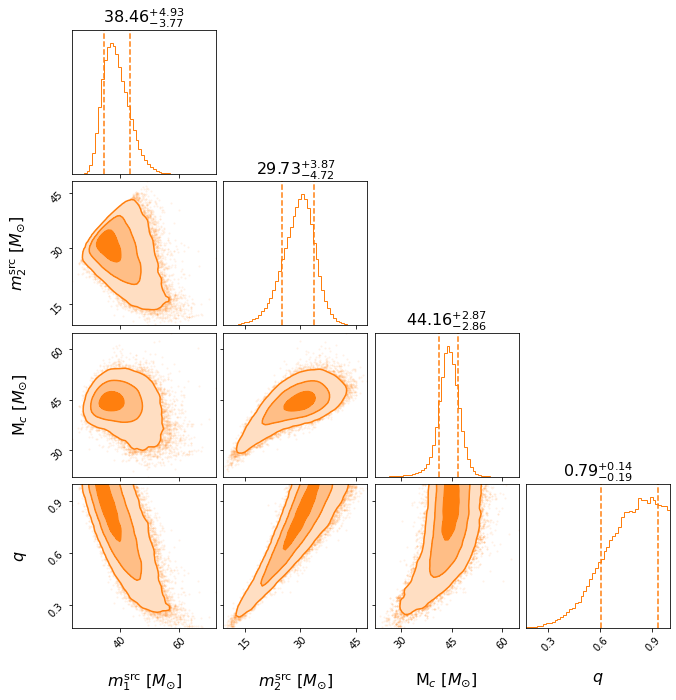

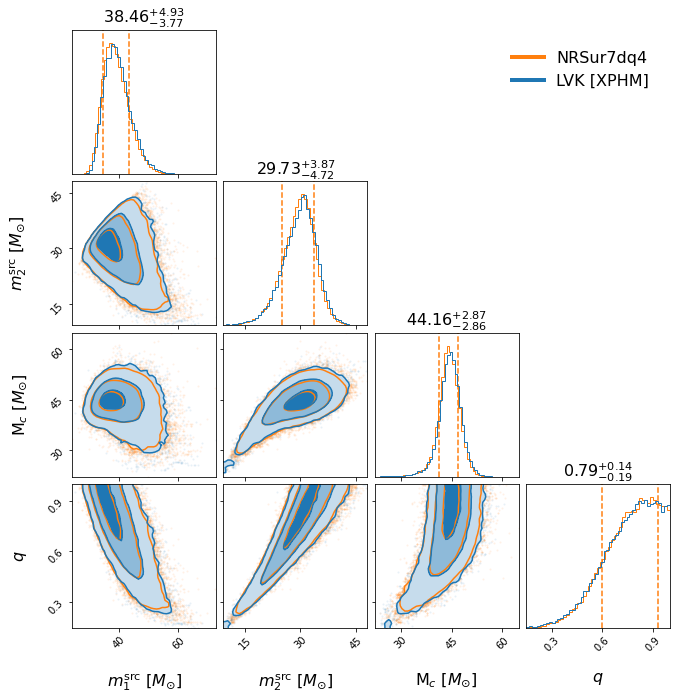

In [5]:
# NRSurrogate corner plots

import os

param_sets = dict(
    mass=["mass_1_source", "mass_2_source", "chirp_mass", "mass_ratio"],
    spin=["a_1", "a_2", "tilt_1", "tilt_2"],
    effective_spin=["mass_ratio", "chi_eff", "chi_p"],
    sky_localisation=["luminosity_distance", "ra", "dec"],
    remnant=["final_mass", "final_spin", "final_kick"],
)
for name, params in param_sets.items():
    fname = f"GW190727_060333_{name}_corner.png"
    if not os.path.isfile(fname):
        fig = nrsur_result.plot_corner(params)
        fig.savefig(fname)

    if name == "remnant":
        continue

    # LVK-Comparison plots
    fname = f"GW190727_060333_compare_{name}_corner.png"
    if not os.path.isfile(fname):
        fig = nrsur_result.plot_lvk_comparison_corner(params)
        fig.savefig(fname)


## Corner Plots


Corner plots of the NRSurCat-1 posteriors. The plots along the diagonal display the 1D marginalized posteriors, with the median values and the central $1\sigma$ credible regions indicated as text. The contour plots display the joint 2D posteriors at the $1,2,3\sigma$ regions. The LVK posteriors are plotted using the IMRPhenomXPHM samples obtained from the the [GWTC-2.1](https://zenodo.org/record/6513631) and [GWTC-3](https://zenodo.org/record/5546663) zenodo releases. 

### Mass


::::{tab-set}

:::{tab-item} NRSurrogate
:sync: key1

!["GW190727_060333_mass_corner.png"](GW190727_060333_mass_corner.png)
:::

:::{tab-item} LVK-Comparison
:sync: key2

!["GW190727_060333_compare_mass_corner.png"](GW190727_060333_compare_mass_corner.png)
:::

::::

Posterior corner plots for the component masses, chirp mass, and mass ratio. All masses are shown in the source frame.



### Spin


::::{tab-set}

:::{tab-item} NRSurrogate
:sync: key1

!["GW190727_060333_spin_corner.png"](GW190727_060333_spin_corner.png)
:::

:::{tab-item} LVK-Comparison
:sync: key2

!["GW190727_060333_compare_spin_corner.png"](GW190727_060333_compare_spin_corner.png)
:::

::::

Posterior corner plots for the component spin magnitudes and angles.


### Effective Spin


::::{tab-set}

:::{tab-item} NRSurrogate
:sync: key1

!["GW190727_060333_effective_spin_corner.png"](GW190727_060333_effective_spin_corner.png)
:::

:::{tab-item} LVK-Comparison
:sync: key2

!["GW190727_060333_compare_effective_spin_corner.png"](GW190727_060333_compare_effective_spin_corner.png)
:::

::::

Posterior corner plots for the mass-ratio, effective spin and in-plane spin.


### Sky-localisation


::::{tab-set}

:::{tab-item} NRSurrogate
:sync: key1

!["GW190727_060333_sky_localisation_corner.png"](GW190727_060333_sky_localisation_corner.png)
:::

:::{tab-item} LVK-Comparison
:sync: key2

!["GW190727_060333_compare_sky_localisation_corner.png"](GW190727_060333_compare_sky_localisation_corner.png)
:::

::::

Posterior corner plots for the luminosity distance, ra and dec.



### Remnant

!["GW190727_060333_remnant_corner.png"](GW190727_060333_remnant_corner.png)


Posterior corner plots for the remnant mass, spin magnitude and kick. 

## Waveform posterior-predictive plot

This is a plot of waveforms generated using 1000 random posterior samples from the event's posterior.

In [6]:
fname = f"GW190727_060333_waveform.png"
if not os.path.isfile(fname):
    fig = nrsur_result.plot_signal(outdir=".")

![waveform](GW190727_060333_waveform.png)

## Animations  
Here are some animations of the posterior.

|Spin       | 
|-----------|
| <video width="630" height="315" controls muted loop autoplay><source src="https://nrsur-catalog.github.io/NRSurCat-1-animations-spins/GW190727_060333_spins.mp4" type="video/mp4"> Your browser does not support the video tag.</video>    |  

Posterior samples for the dimensionless spin vectors (chi1, chi2) 
of the component black holes. Each purple marker indicates a posterior sample; 
an arrow drawn from the origin to the marker would show the spin vector. 
The outer radii of the spheres correspond to the maximum spin magnitude of 1. 
The spins are shown in the "wave frame" defined at a reference frequency of 20 Hz. 
The x-axis (orange) and y-axis (green) are shown as arrows near the origin; 
the x-y plane is orthogonal to the orbital angular momentum direction. 
The color reflects posterior probability density.

|Remnant       | 
|-----------|
| <video width="630" height="315" controls muted loop autoplay><source src="https://nrsur-catalog.github.io/NRSurCat-1-animations-remnant/GW190727_060333_remnant.mp4" type="video/mp4"> Your browser does not support the video tag.</video>    | 

Posterior samples for the dimensionless spin vector (chif) and the recoil kick velocity 
(vf, units of km/s). Each purple marker indicates a posterior sample; 
an arrow drawn from the origin to the marker would show the spin or kick vector. 
For the spin, the outer radii of the spheres correspond to the maximum spin magnitude of 1. 
For the kick, the outer radius of the sphere corresponds to a kick magnitude of 2500 km/s.
The remnant spin and kick are shown in the "wave frame" defined at a 
reference time of -100 M_det before the peak waveform amplitude,
where M_det is the detector frame total mass.


## Analysis configs
Below are the configs used for the analysis of this job.

In [7]:
nrsur_result.print_configs()

Tmax:                               10000
accounting:                         None
accounting_user:                    None
adapt:                              False
allow_tape:                         True
analysis_executable:                None
analysis_executable_parser:         None
autocorr_c:                         5.0
autocorr_tol:                       50.0
bilby_zero_likelihood_mode:         False
burn_in_nact:                       50.0
calibration_model:                  CubicSpline
calibration_prior_boundary:         reflective
catch_waveform_errors:              True
channel_dict:                       {H1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01, L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01, V1:Hrec_hoft_16384Hz}
check_point_deltaT:                 3600
clean:                              False
coherence_test:                     False
conda_env:                          None
condor_job_priority:                0
conversion_function:                None
create_summary:              

If you used this data, please [cite this work](citation_section).

## Comments
Leave a comment in this [issue](https://github.com/nrsur-catalog/NRSurCat-1/issues/new?title=GW190727_060333).